In [2]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
from matplotlib import pyplot as plt
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import OneClassSVM

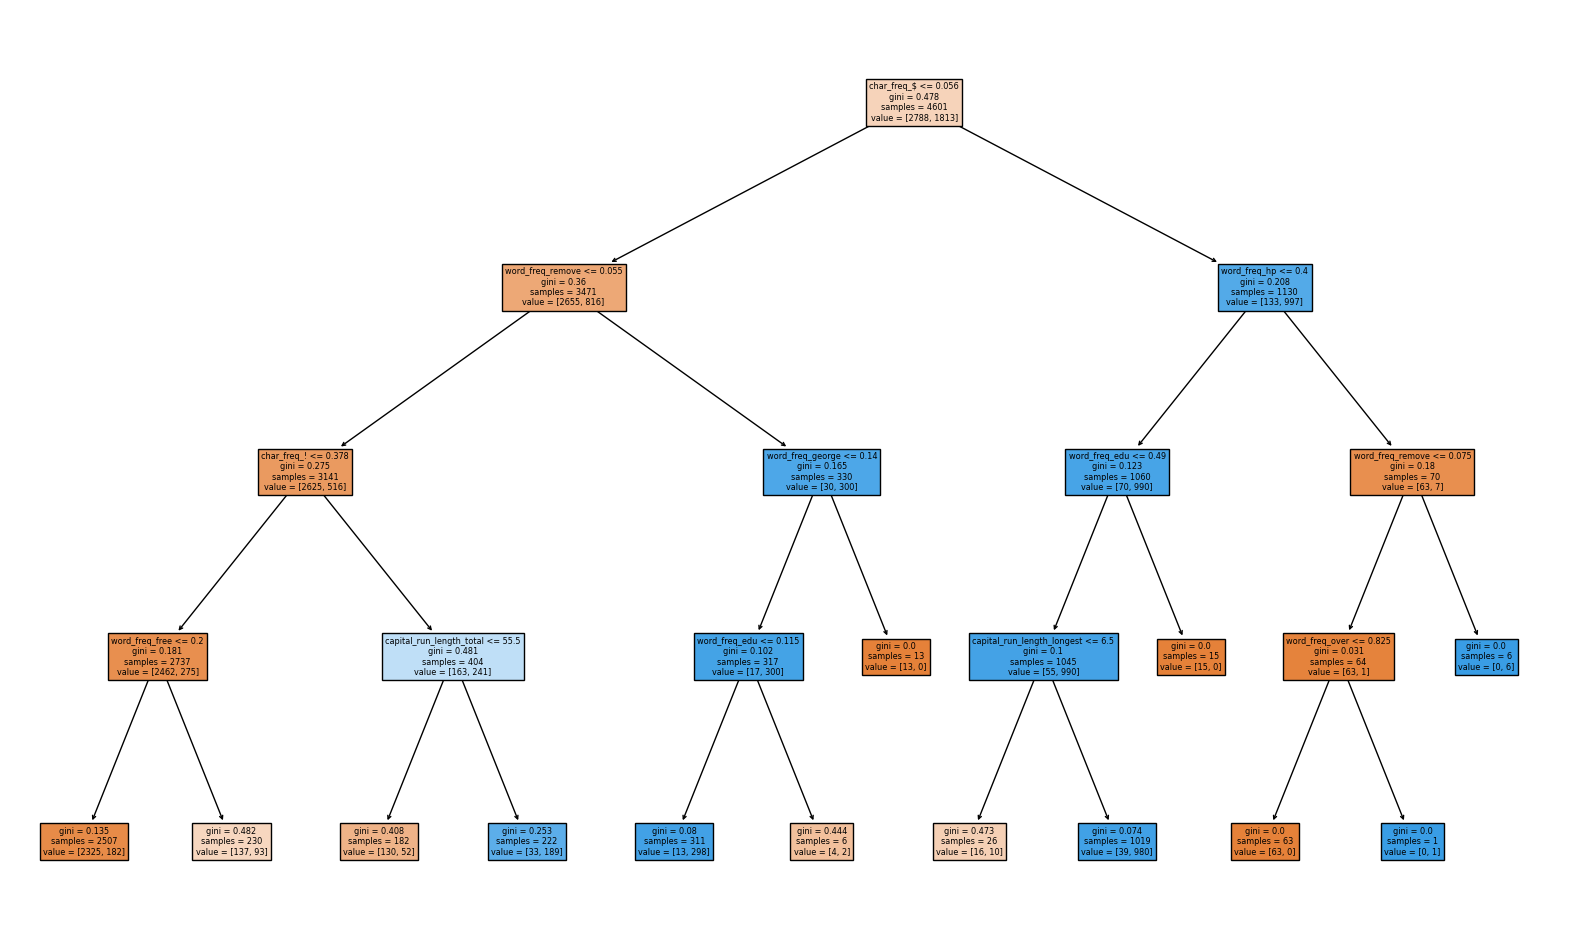

Random Forest Classifier error:  0.034744842562432154
Decision Tree Classifier error:  0.06406080347448428


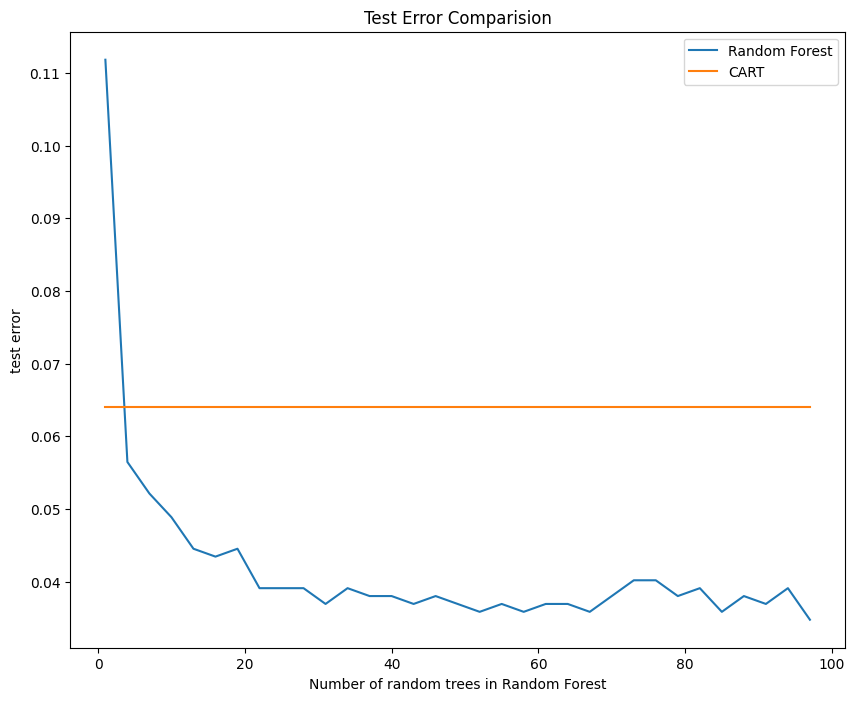

In [3]:
f = open('spambase.data', "r")
data = []
for line in f:
    line = line.strip().split(',')
    line = list(map(float,line))
    data.append(line)
df = pd.DataFrame(data)

f = open('spambase.names','r')
names = []
start_read = False
for line in f:
    line = line.strip()
    if line and start_read:
        names.append(line.split(':')[0])
    if line.startswith('1, 0'):
        start_read = True
names.append('spam')
df.columns =names


X = df.drop('spam', axis=1)
y = df['spam']

clf_tree = tree.DecisionTreeClassifier(max_depth = 4)
clf_tree.fit(X, y)
plt.figure(figsize = (20,12))
tree.plot_tree(clf_tree,filled = True,feature_names = df.columns[:-1])
plt.show()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

clf_forest = RandomForestClassifier(random_state=10)
clf_forest.fit(X_train,y_train)
forest_accuracy = clf_forest.score(X_test,y_test)
print('Random Forest Classifier error: ', 1 -  forest_accuracy)

clf_tree = tree.DecisionTreeClassifier()
clf_tree.fit(X_train,y_train)
tree_accuracy = clf_tree.score(X_test,y_test)
print('Decision Tree Classifier error: ', 1 -  tree_accuracy)


test_errors = []
for num_trees in range(1,100,3):
    model = RandomForestClassifier(n_estimators = num_trees, random_state=0)
    model.fit(X_train, y_train)
    score = model.score(X_test,y_test)
    test_errors.append([num_trees, 1 - score])
test_errors = np.array(test_errors)

tree_test_error = [1 - tree_accuracy] * len(test_errors)


fig, ax = plt.subplots(figsize = (10,8))
ax.plot(test_errors[:,0], test_errors[:,1], label = 'Random Forest')
ax.plot(test_errors[:,0], tree_test_error, label = 'CART')
plt.legend()
plt.title('Test Error Comparision')
plt.xlabel('Number of random trees in Random Forest')
plt.ylabel('test error')
plt.show()





In [6]:
X_train_nonspam = X_train[y_train == 0]

clf = OneClassSVM(kernel = 'rbf', gamma=0.025).fit(X_train_nonspam)
ytest_pred = clf.predict(X_test)
ytest_pred[ytest_pred == 1] = 0
ytest_pred[ytest_pred == -1] = 1
osvm_error = sum(ytest_pred != y_test)/len(y_test)
osvm_error


0.3735070575461455

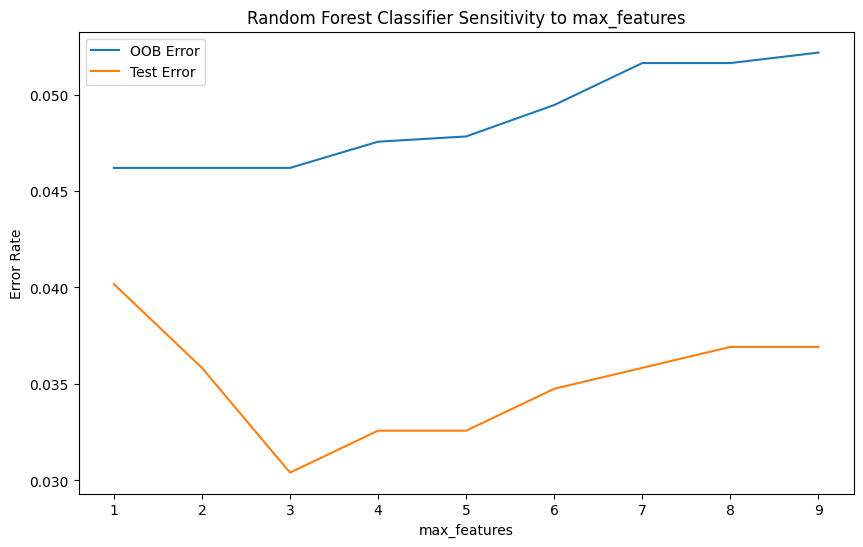

In [31]:

max_features_values = np.arange(1,10,1)
oob_errors = []
test_errors = []


for max_features in max_features_values:
    clf = RandomForestClassifier(max_features=max_features, oob_score=True)
    clf.fit(X_train, y_train)


    oob_errors.append(1 - clf.oob_score_)
    test_errors.append(1 - clf.score(X_test, y_test))


plt.figure(figsize=(10, 6))
plt.plot(max_features_values, oob_errors, label='OOB Error')
plt.plot(max_features_values, test_errors, label='Test Error')
plt.title('Random Forest Classifier Sensitivity to max_features')
plt.xlabel('max_features')
plt.ylabel('Error Rate')
plt.legend()
plt.show()

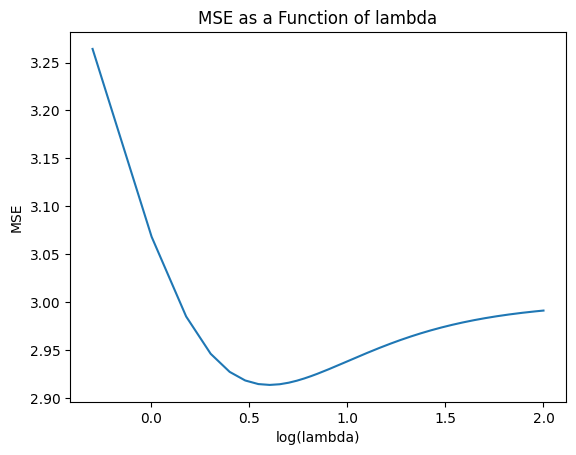

In [79]:
X_train = np.array([[0.15], [1.1]])
y_train = np.array([-1, 1])
X_test = np.array([[1.5]])
beta_true = np.array([-1, 1])
sigma_squared = 0.5

def ridge_regression(X, y, lambda_val):
    p = X.shape[1]
    identity_matrix = np.identity(p)
    beta_hat = np.linalg.inv(X.T @ X + lambda_val * identity_matrix) @ X.T @ y
    return beta_hat

def calculate_mse(X, y, beta_true, lambda_val):
    beta_hat = ridge_regression(X, y, lambda_val)
    mse = np.mean((X @ beta_hat - y) ** 2) + np.sum((beta_hat - beta_true) ** 2)
    return mse


lambda_values = np.linspace(0, 100,200)
mse_values = [calculate_mse(X_train, y_train, beta_true, lambda_val) for lambda_val in lambda_values]
plt.plot(np.log10(lambda_values), mse_values)
plt.xlabel('log(lambda)')
plt.ylabel('MSE')
plt.title('MSE as a Function of lambda')
plt.show()
